In [3]:
import sys
print(sys.executable)
!{sys.executable} -m pip install pandas matplotlib seaborn


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


/opt/homebrew/Cellar/jupyterlab/4.4.9/libexec/bin/python
  Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.6-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.3.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-macosx_10_13_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl (10.7 MB)
Using cached matplotlib-3.10.6-

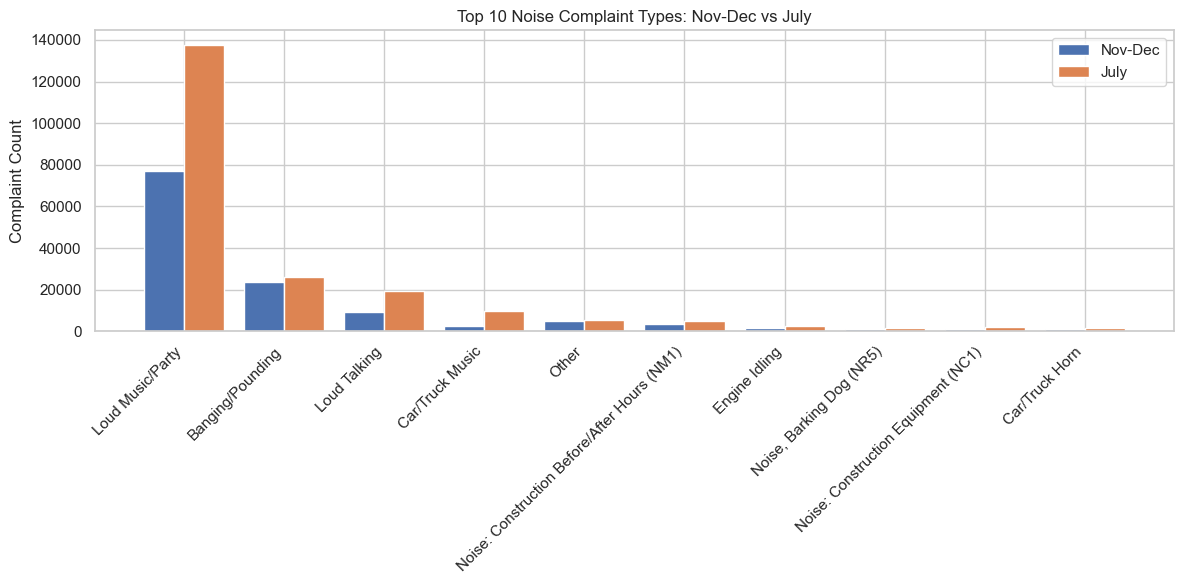

In [16]:


def load_file(path):
    descriptors, counts = [], []
    with open(path, "r") as f:
        lines = f.readlines()
    for line in lines[1:]:  # skip header
        line = line.strip()
        if not line:
            continue
        parts = line.rsplit(",", 1)  # split on last comma
        descriptor = parts[0]
        count = int(parts[1])
        descriptors.append(descriptor)
        counts.append(count)
    return pd.DataFrame({"decriptor": descriptors, "count": counts})

nov_dec = load_file("../data/noiseReasonNovDec.csv")
july = load_file("../data/noiseReasonJulSep.csv")

merged = pd.merge(nov_dec, july, on="decriptor", suffixes=("_NovDec", "_July"))

merged["total"] = merged["count_NovDec"] + merged["count_July"]
merged_top10 = merged.sort_values("total", ascending=False).head(10)

plt.figure(figsize=(12, 6))
x = range(len(merged_top10))

plt.bar(x, merged_top10["count_NovDec"], width=0.4, label="Nov-Dec", align="center")
plt.bar([i + 0.4 for i in x], merged_top10["count_July"], width=0.4, label="July", align="center")

plt.xticks([i + 0.2 for i in x], merged_top10["decriptor"], rotation=45, ha="right")
plt.ylabel("Complaint Count")
plt.title("Top 10 Noise Complaint Types: Nov-Dec vs July")
plt.legend()
plt.tight_layout()
plt.show()